In [29]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ( 'geolocation.csv','geolocation'),
    ('orders.csv', 'orders'),
    ('salers.csv', 'salers'),
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='test123',
    database='ecommerce_db'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path =r'C:\Users\Amanp\Documents\PY + Sql\python + SQL project'

#converts Pandas data types into MySQL data types.

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)
    

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly # Converts NaN values into None (so SQL can store them as NULL)
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing geolocation.csv
NaN values before replacement:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing salers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: 

### what is Cursor ?
->> A cursor is an object in Python that allows interaction with the database.
->> It is used to execute SQL queries and fetch results from the database.
#### Need of cursor :-
A cursor acts as a bridge between Python and MySQL.
It helps in sending SQL commands and retrieving data.
### Why is Closing the Cursor Important?
->> Closing the cursor (cursor.close()) releases database resources.
->> It's a good practice to close the connection (conn.close()) after database operations are completed.


### What does this  above script do ?
-> The script automatically reads multiple CSV files (like customers.csv, orders.csv, etc.).
 ->> It checks the structure (columns and data types) of each CSV file and creates a corresponding table in MySQL if it does not already exist.
 ->> It then inserts the data from the CSV file into the MySQL table while handling missing values (i.e., converting NaN in Pandas to None, which becomes NULL in MySQL).
 >>-The entire process runs dynamically, meaning it adapts to different CSV files without needing manual changes.

In [5]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.1 MB 3.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.8/16.1 MB 3.2 MB/s eta 0:00:05
   ------ --------------------------------- 2.6/16.1 MB 3.5 MB/s eta 0:00:04
   --------- ------------------------------ 3.7/16.1 MB 3.8 MB/s eta 0:00:04
   ------------ --------------------------- 5.0/16.1 MB 4.3 MB/s eta 0:00:03
   ---------------- ----------------------- 6.6/16.1 MB 4.7 MB/s eta 0:00:03
   -------------------- ------------------- 8.1/16.1 MB 5.2 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.1 MB 5.6 MB/s eta 0:00:02
   ----------------------------- ---------- 11.8/16.1 MB 5.9 MB/s eta 0:00:01
   --------------------------------- ------ 13.6/16.1 MB 6.2 MB/s eta 0:00:01
   ------

In [9]:
import os
print(os.getcwd())  # Print the current working directory


C:\Users\Amanp\Documents\PY + Sql\python + SQL project


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "test123",
                            database = "ecommerce_db")

cur = db.cursor()

### List all unique cities where customers are located.

In [136]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [16]:
df = pd.DataFrame(data)
df

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


### Count the number of orders placed in 2017

In [25]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp)=2017"""

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 135303)

### Find the total sales per category.

In [104]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()
data

[('PERFUMERY', 1013477.32),
 ('FURNITURE DECORATION', 2860352.78),
 ('TELEPHONY', 973764.1),
 ('BED TABLE BATH', 3425107.34),
 ('AUTOMOTIVE', 1704588.66),
 ('COMPUTER ACCESSORIES', 3170660.89),
 ('HOUSEWARES', 2189516.26),
 ('BABIES', 1079691.32),
 ('TOYS', 1238075.38),
 ('FURNITURE OFFICE', 1293652.97),
 ('COOL STUFF', 1559396.0),
 ('HEALTH BEAUTY', 3314746.24),
 ('PET SHOP', 622537.94),
 ('GENERAL INTEREST BOOKS', 129389.52),
 ('STATIONARY STORE', 634880.14),
 ('WATCHES PRESENT', 2858433.36),
 ('PCS', 558243.1),
 ('CLIMATIZATION', 182341.32),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 482951.26),
 ('SPORT LEISURE', 2784255.12),
 ('BAGS ACCESSORIES', 374302.58),
 ('ELECTRONICS', 519714.2),
 ('CASA CONSTRUCAO', 273290.58),
 ('GAMES CONSOLES', 390960.76),
 ('FASHION BAGS AND ACCESSORIES', 436316.56),
 ('HOME APPLIANCES', 191064.54),
 ('GARDEN TOOLS', 1676561.5),
 ('AGRO INDUSTRIA E COMERCIO', 237461.22),
 (None, 505603.42),
 ('AUDIO', 120649.24),
 ('TECHNICAL BOOKS', 49830.88),
 ('CONSTRUCTIO

In [105]:
df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,1013477.32
1,FURNITURE DECORATION,2860352.78
2,TELEPHONY,973764.10
3,BED TABLE BATH,3425107.34
4,AUTOMOTIVE,1704588.66
...,...,...
69,CDS MUSIC DVDS,2398.86
70,LA CUISINE,5827.06
71,FASHION CHILDREN'S CLOTHING,1571.34
72,PC GAMER,4348.86


C:\Users\Amanp\AppData\Local\Temp\ipykernel_22580\2097920982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="Category", data=top_cities, palette="cividis")


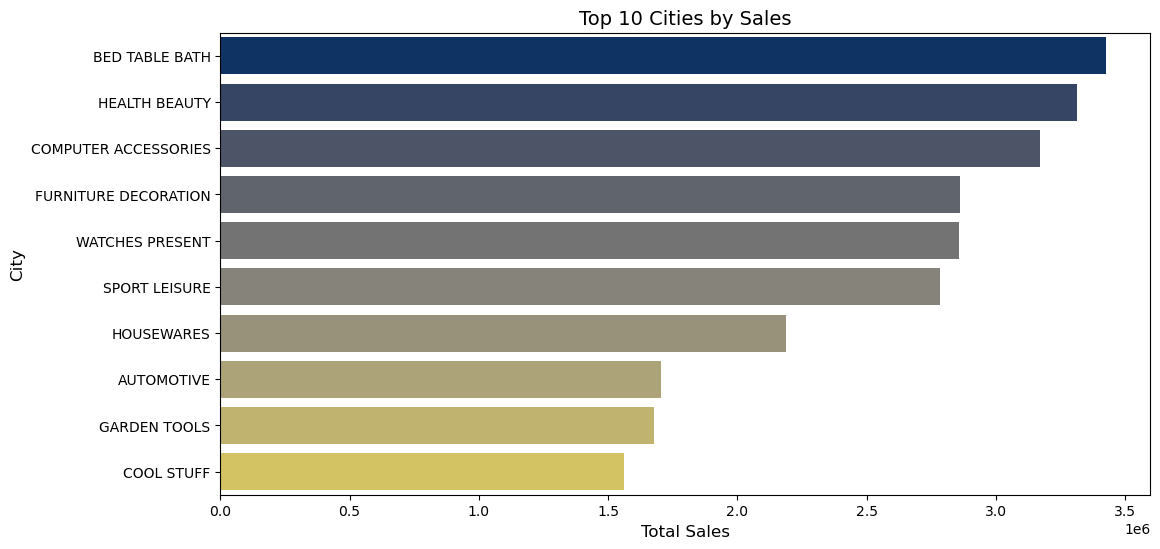

In [106]:
# Get the top 10 cities with highest sales
top_cities = df.nlargest(10, "Sales")

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x="Sales", y="Category", data=top_cities, palette="cividis")

# Add title and labels
plt.title("Top 10 Cities by Sales", fontsize=14)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("City", fontsize=12)

# Show the plot
plt.show()

### Calculate the percentage of orders that were paid in installments

In [55]:
query = """ SELECT 
    (SUM(CASE WHEN payment_installments > 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) 
    AS installment_percentage  
FROM payments;
"""

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('49.41763'))

### Count the number of customers from each state.

In [60]:
query = """  select customer_state ,count(customer_id)
from customers group by customer_state """

cur.execute(query)

data = cur.fetchall()
data

[('SP', 125238),
 ('SC', 10911),
 ('MG', 34905),
 ('PR', 15135),
 ('RJ', 38556),
 ('RS', 16398),
 ('PA', 2925),
 ('GO', 6060),
 ('ES', 6099),
 ('BA', 10140),
 ('MA', 2241),
 ('MS', 2145),
 ('CE', 4008),
 ('DF', 6420),
 ('RN', 1455),
 ('PE', 4956),
 ('MT', 2721),
 ('AM', 444),
 ('AP', 204),
 ('AL', 1239),
 ('RO', 759),
 ('PB', 1608),
 ('TO', 840),
 ('PI', 1485),
 ('AC', 243),
 ('SE', 1050),
 ('RR', 138)]

In [66]:
df = pd.DataFrame(data, columns = ["state", "customer_count" ])
df = df.sort_values(by = "customer_count", ascending= False)
df

,state,customer_count
0,SP,125238
4,RJ,38556
2,MG,34905
5,RS,16398
3,PR,15135
1,SC,10911
9,BA,10140
13,DF,6420
8,ES,6099
7,GO,6060


C:\Users\Amanp\AppData\Local\Temp\ipykernel_22580\3325974533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x="customer_count",y="state", data=top_customers_cities ,palette = "Oranges")


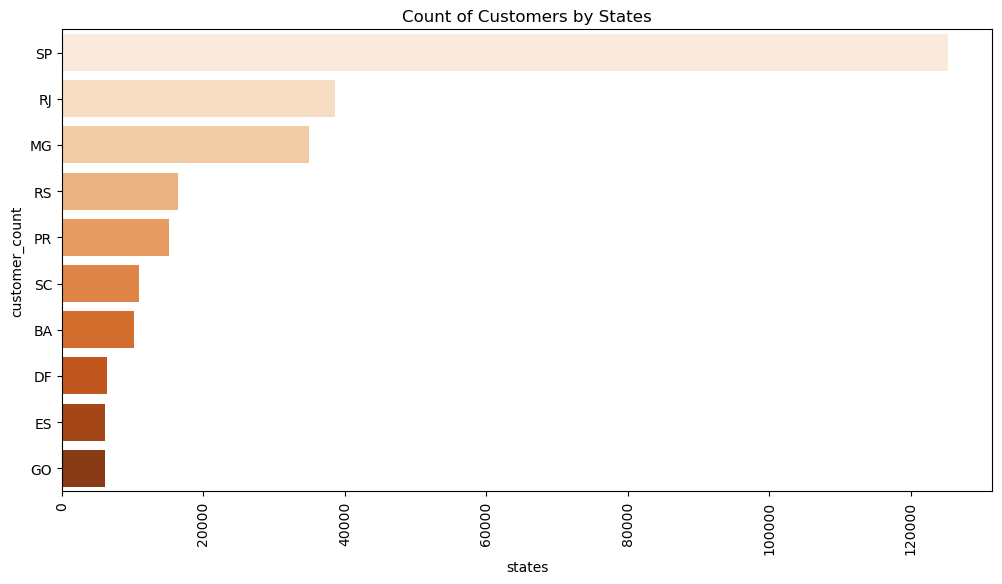

In [100]:
# Get the top 10 count of customers by state
top_customers_cities = df.nlargest(10, "customer_count")

plt.figure(figsize=(12, 6))
sns.barplot( x="customer_count",y="state", data=top_customers_cities ,palette = "Oranges")


plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

### Calculate the number of orders per month in 2017.

In [119]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2017
group by months
"""

cur.execute(query)

data = cur.fetchall()
data

[('October', 13893),
 ('November', 22632),
 ('July', 12078),
 ('April', 7212),
 ('May', 11100),
 ('January', 2400),
 ('December', 17019),
 ('September', 12855),
 ('August', 12993),
 ('March', 8046),
 ('June', 9735),
 ('February', 5340)]

In [121]:
df = pd.DataFrame(data, columns = ["months", "order_count"])
df

,months,order_count
0,October,13893
1,November,22632
2,July,12078
3,April,7212
4,May,11100
5,January,2400
6,December,17019
7,September,12855
8,August,12993
9,March,8046


C:\Users\Amanp\AppData\Local\Temp\ipykernel_22580\733592647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="months", y="order_count", data=df_sorted, palette="Blues_r")


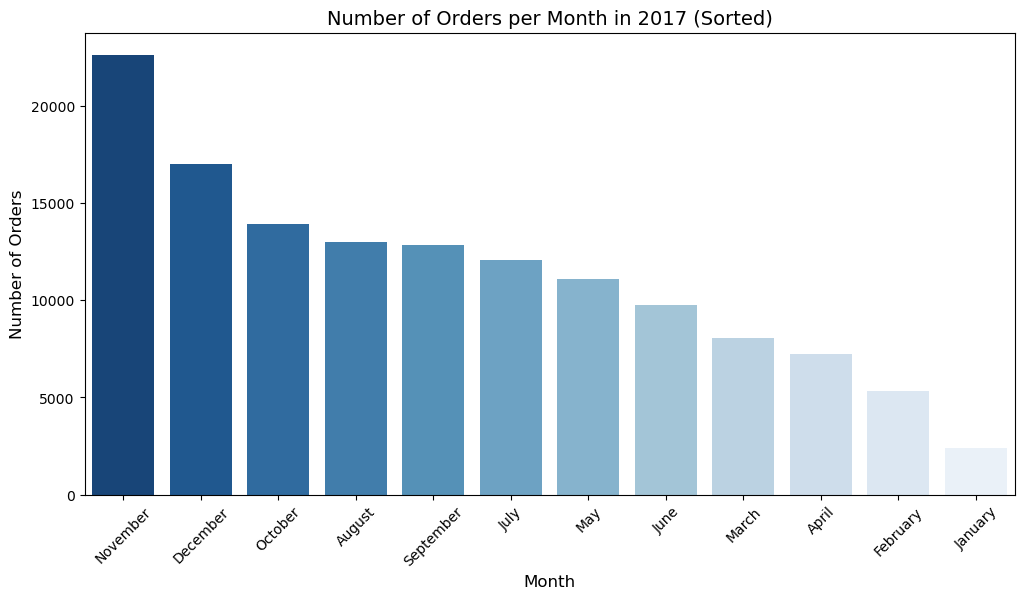

In [132]:

# Sort the DataFrame by the number of orders
df_sorted = df.sort_values(by="order_count", ascending=False)  


plt.figure(figsize=(12, 6))
sns.barplot(x="months", y="order_count", data=df_sorted, palette="Blues_r")  

plt.title("Number of Orders per Month in 2017 (Sorted)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)  

plt.show()

